# Exploratory Data Analysis

- Import the libraries
- Big picture 
- Missing Values
- Dependent Variable (Price)
- Numeric variables (Area)
- Categorical variebles(Location)

### 1.) Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.) Big Picture

In [4]:
dataset = pd.read_csv('land_price_data.csv',index_col = 0)
dataset

,Price,Location,Area
0,8000,Douala,10000.0
1,55000,Yassa,300.0
2,55000,Yassa,200.0
3,55000,Japoma,735.0
4,55000,Japoma,1500.0
...,...,...,...
4485,6500,Yassa,150.0
4486,17000,Tsinga,1000.0
4487,50000,Bonaberi,300.0
4488,50000,Bonaberi,1000.0


In [29]:
dataset.head(20)

,Price,Location,Area
0,8000,Douala,10000.0
1,55000,Yassa,300.0
2,55000,Yassa,200.0
3,55000,Japoma,735.0
4,55000,Japoma,1500.0
5,3000,Mfou,174000.0
6,16000000,Biyem-Assi,270.0
7,60000,Kribi,5000.0
8,150000,Kribi,1000.0
9,8000,Douala,10000.0


In [30]:
print(16000000/270)

59259.25925925926


In [11]:
dataset.nunique()

Price       397
Location    161
Area        549
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4490 entries, 0 to 4489
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     4490 non-null   int64  
 1   Location  4490 non-null   object 
 2   Area      4270 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 140.3+ KB


In [13]:
dataset.describe()

,Price,Area
count,4.490000e+03,4270.000000
mean,4.961029e+07,10036.810304
std,8.482607e+08,42361.933909
min,0.000000e+00,0.000000
25%,1.000000e+04,500.000000
50%,3.500000e+04,1000.000000
75%,5.000000e+05,5393.750000
max,4.500000e+10,500000.000000


### 3.) Missing Values

In [15]:
dataset.isna().any()

Price       False
Location    False
Area         True
dtype: bool

In [16]:
dataset['Area'].isna().sum()

220

In [17]:
data = dataset.copy()

In [18]:
data

,Price,Location,Area
0,8000,Douala,10000.0
1,55000,Yassa,300.0
2,55000,Yassa,200.0
3,55000,Japoma,735.0
4,55000,Japoma,1500.0
...,...,...,...
4485,6500,Yassa,150.0
4486,17000,Tsinga,1000.0
4487,50000,Bonaberi,300.0
4488,50000,Bonaberi,1000.0


### 4.) Dependent (Price)

In [21]:
dataset.Price.value_counts()

8000         538
25000        205
35000        141
15000        133
30000        126
            ... 
15500000       1
260000000      1
28350000       1
81000000       1
0              1
Name: Price, Length: 397, dtype: int64

<AxesSubplot:>

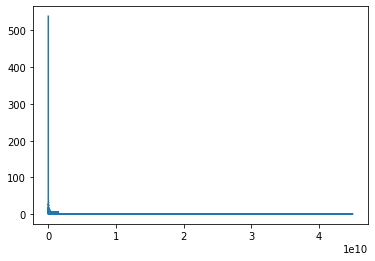

In [23]:
data['Price'].value_counts().plot()

<AxesSubplot:xlabel='Price', ylabel='count'>

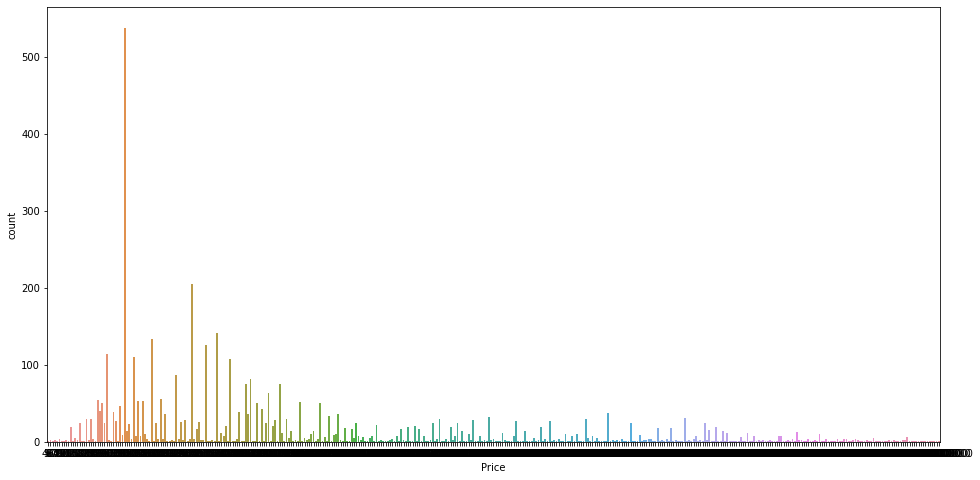

In [28]:
plt.figure(figsize = (16,8))
sns.countplot(x ='Price', data = data)

### 5.) Numeric variables(Area)

In [31]:
data.['Area'].describe()

count      4270.000000
mean      10036.810304
std       42361.933909
min           0.000000
25%         500.000000
50%        1000.000000
75%        5393.750000
max      500000.000000
Name: Area, dtype: float64

<AxesSubplot:xlabel='Area'>

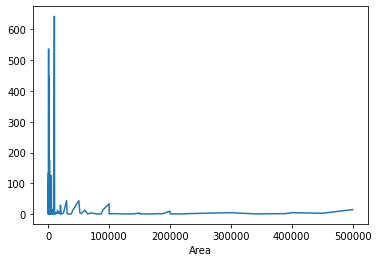

In [34]:
data.groupby('Area').size().sort_index().plot()

### 6.) Location

<AxesSubplot:>

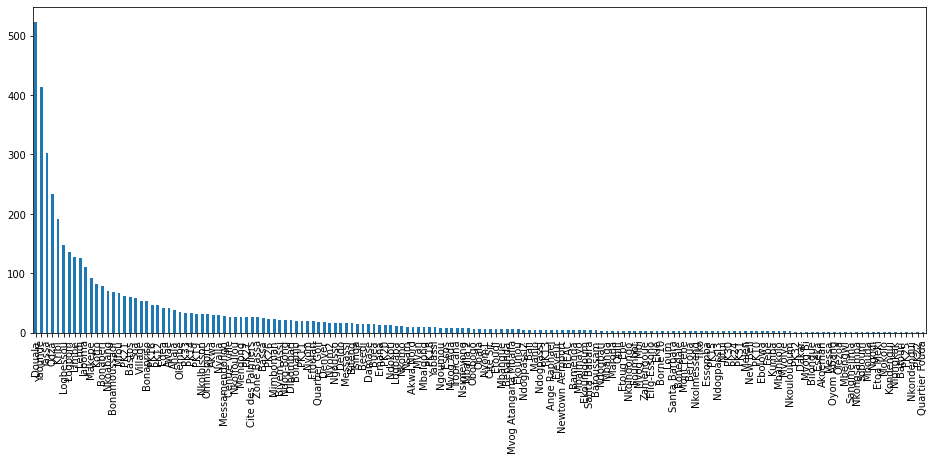

In [40]:

dataset['Location'].value_counts().plot(kind = 'bar', figsize = (16,6))

In [49]:
frequency_loc = pd.DataFrame(data.groupby('Location')['Price'].count()/len(data)*100)
frequency_loc.sort_values('Price', ascending = False)

,Price
Location,
Douala,11.648107
Yaoundé,9.220490
Yassa,6.748330
Odza,5.211581
Kribi,4.253898
...,...
Mbouda,0.022272
Eséka,0.022272
Mbengwi,0.022272


In [58]:
frequency_loc = frequency_loc[frequency_loc['Price'] > 0.5]

In [61]:
data['Location'] = np.where(data['Location'].isin(frequency_loc.index),dataset['Location'],"Rare neighbourhood")

In [62]:
data

,Price,Location,Area
0,8000,Douala,10000.0
1,55000,Yassa,300.0
2,55000,Yassa,200.0
3,55000,Japoma,735.0
4,55000,Japoma,1500.0
...,...,...,...
4485,6500,Yassa,150.0
4486,17000,Rare neighbourhood,1000.0
4487,50000,Bonaberi,300.0
4488,50000,Bonaberi,1000.0
